# Aritmética de ponto flutuante e conversão numérica

Computadores representam números inteiros de maneira exata. Entretanto, números reais possuem apenas representações aproximadas e em quantidades finitas. A aritmética computacional comumente opera com números inteiros e com os chamados _números em ponto flutuante._

O interesse da aritmética computacional resume-se em dois pontos principais: i) a representação de números no formato de máquina (binário) e ii) a construção de algoritmos que realizam as operações fundamentais (adição, subtração, multiplicação e divisão). Em linhas gerais, métodos numéricos resultam de algoritmos sofisticados que utilizam essas quatro operações. 

Atualmente, o padrão IEEE 754 é o mais amplamente seguido pelos fabricantes de processadores modernos. O documento orienta sobre como números em ponto flutuante devem ser representados, operados e comportar-se em qualquer arquitetura, seja de 16, 32, 64 ou mesmo 128 bits. A última atualização do padrão, cujo ano de origem é 1985, ocorreu em 2019 e está documentada neste [artigo](https://ieeexplore.ieee.org/document/8766229).

## Unidade Lógica e Aritmética

A _Unidade Lógica e Aritmética_ (ULA) é a parte do hardware computacional conectada à unidade central de processamento (CPU) que realiza as operações aritméticas e lógicas sobre os dados processados. A ULA é um componente eletrônico que funciona segundo a lógica dos cicuitos digitais, ou seja, interpretando operações em lógica Booleana (`and`, `or`, `not`).

Há muito mais por trás das operações fundamentais executadas pelos computadores. Em Python, por exemplo, há casos de aproximações que chegam a ser curiosos. Isto ocorre devido ao erro inerente da representação numérica, principalmente quando os números são fracionários.

## Casos curiosos

A aritmética de ponto flutuante possui situações inusitadas e respostas estranhas que podem levar-nos a duvidar se estamos realizando operações corretamente. Abaixo, mostramos alguns casos curiosos que ocorrem devido à representação finita de números pelo computador.


- A fração $1/3 \approx 0.3333\ldots$ é uma dízima. O seu triplo é?

In [66]:
1/3

0.3333333333333333

In [65]:
1/3 + 1/3 + 1/3

1.0

- A soma $0.3 + 0.3 + 0.3$ difere de $0.9$.

In [8]:
0.3 + 0.3 + 0.3

0.8999999999999999

- $1/10 + 1/10 + 1/10 \neq 3/10$

In [69]:
1/10 + 1/10 + 1/10 == 3/10

False

- Multiplicação por fracionários

In [104]:
# note a variabilidade de dígitos após o ponto
for x in [0.3, 0.33, 0.333, 0.3333, 0.33333, 0.333333, 0.3333333, 0.333333333]:
    print(f'3*{x}'.ljust(13,' '),'=', 3*x, sep=' ')

3*0.3         = 0.8999999999999999
3*0.33        = 0.99
3*0.333       = 0.9990000000000001
3*0.3333      = 0.9999
3*0.33333     = 0.99999
3*0.333333    = 0.999999
3*0.3333333   = 0.9999998999999999
3*0.333333333 = 0.999999999


- Séries numéricas

Consideremos a série (descendente, do menor para o maior)

$$S_D(n) = \sum_{k=1}^n \frac{1}{k} = 1 + \frac{1}{2} + \ldots + \frac{1}{n-1} + \frac{1}{n}$$

e a sua versão escrita como uma somatória invertida (ascendente, do menor para o maior), ou seja,

$$S_A(n) = \sum_{k=n}^1 \frac{1}{k} = \frac{1}{n} + 1 + \frac{1}{n-1} + \ldots + \frac{1}{2} + 1$$

É evidente que $S_A(n)$ e $S_D(n)$ são matematicamente equivalentes e devem produzir o mesmo resultado independentemente de $n$ e do sentido em que forem somadas. Porém, vejamos o que acontece ao programarmos uma pequena função para computar ambas as formas.


In [1]:
from prettytable import PrettyTable as pt

# define séries
def S(n):
    
    S_D = 0
    for k in range(1,n+1):
        S_D += 1/k        
         
    S_A = 0
    for k in range(n,0,-1):
        S_A += 1/k       
    
    # diferença    
    E = S_D - S_A
    
    return S_D, S_A, E
    
# cria objeto para tabela
tbl = pt()
tbl.field_names = ['n','S_A(n)','S_D(n)','S_D(n) - S_A(n)']
tbl.align = 'c'

# loop de teste
for n in [10**1, 10**2, 10**3, 10**4,10**5]:
    sd, sa, e = S(n)    
    row = [n,sd,sa,e]
    tbl.add_row(row)
   
# imprime tabela
print(tbl)


+--------+--------------------+--------------------+------------------------+
|   n    |       S_A(n)       |       S_D(n)       |    S_D(n) - S_A(n)     |
+--------+--------------------+--------------------+------------------------+
|   10   | 2.9289682539682538 | 2.9289682539682538 |          0.0           |
|  100   | 5.187377517639621  | 5.1873775176396215 | -8.881784197001252e-16 |
|  1000  | 7.485470860550343  | 7.485470860550341  | 2.6645352591003757e-15 |
| 10000  | 9.787606036044348  | 9.787606036044386  | -3.730349362740526e-14 |
| 100000 | 12.090146129863335 | 12.090146129863408 | -7.283063041541027e-14 |
+--------+--------------------+--------------------+------------------------+


Como se percebe pela última coluna, os valores produzidos pelas somas para $n > 10$ não são exatamente iguais. Embora exista diferenças ínfimas nos resultados, da ordem de $10^{-14}$ ou $10^{-16}$, elas não são zero, assim indicando que a maneira como computamos expressões matemáticas cujos resultados são idênticos pode levar a resultados distintos. 

## A finitude explicada

Os casos acima possuem uma razão comum: a capacidade finita dos computadores para representar números fracionários. Vamos analisar de modo breve o caso da fração 1/10 sem nos aprofundar em detalhes.

Em um computador de arquitetura 64 bits que segue o padrão IEEE 754, a melhor aproximação para 1/10 é um número com 55 dígitos decimais.

In [105]:
# imprime número com 55 dígitos
print(format(0.1,'.55f'))

0.1000000000000000055511151231257827021181583404541015625


Notemos que tentar aumentar os dígitos não produzirá significância:

In [106]:
# imprime número com 60 dígitos
print(format(0.1,'.60f'))

0.100000000000000005551115123125782702118158340454101562500000


In [107]:
# imprime número com 80 dígitos
print(format(0.1,'.80f'))

0.10000000000000000555111512312578270211815834045410156250000000000000000000000000


Portanto, quando somamos 1/10 + 1/10 + 1/10 vemos um número diferente de 3/10.

In [108]:
# imprime número com 55 dígitos
print(format(0.1 + 0.1 + 0.1,'.55f'))

0.3000000000000000444089209850062616169452667236328125000


## Notação científica

Números em ponto flutuante são a versão computacional da notação científica. Escrevemos um número decimal em notação científica da seguinte forma:

$$x = f \times 10^e,$$

com a fração (ou mantissa) $f$ determinando a precisão e o expoente $e$ a ordem de grandeza. Pontos flutuantes admitem $f$ na forma _normalizada_, isto é, menor do que 1. A tabela abaixo mostra alguns exemplos de como usamos essas notações.


| Número decimal | Notação científica | Repr. ponto flutuante
|:---------------|--------------------|------:|
|$2.65$ | $2.65 \times 10^0$ | $0.265 \times 10^1$|
|$0.0000012$ | $1.2 \times 10^{-6}$ | $0.12 \times 10^{-5}$|
|$4532$ | $4.532 \times 10^{3}$ | $0.4532 \times 10^{4}$|

Em termos de código, a notação científica em base 10 pode ser realizada da seguinte forma:

In [113]:
2.65e0, 1.2e-6, 0.4532e4

(2.65, 1.2e-06, 4532.0)

## Conversão numérica entre sistemas

Nesta seção são dados exemplos de como converter números entre os sistemas mais comuns: binário, decimal e hexadecimal.


In [ ]:
# (100)_2 -> base 10
c = int('100',base=2)
print(c)

# representação  
print(1*2**2 + 0*2**1 + 0*2**0)

# (4)_10 -> base 2
# obs: note que '0b' indica que o número é binário
c = bin(4)
print(c)

In [ ]:
# (222)_8
c = int('222',base=8)
print(c)

# representação  
print(2*8**2 + 2*8**1 + 2*8**0)

# (146)_10 -> base 8

c = oct(146)
# obs: note que '0o' indica que o número é octal
print(c)

In [ ]:
# (2AE4)_16
c = int('2ae4',base=16)
print(c)

# representação  
# obs: A = 10; E = 14
print(2*16**3 + 10*16**2 + 14*16**1 + 4*166**0)

# (146)_10 -> base 8

c = oct(146)
# obs: note que '0o' indica que o número é octal
print(c)

## Máquina binária 

O código abaixo é um protótipo para implementação de uma máquina binária. Uma versão muito mais robusta e melhor implementada pode ser vista aqui: https://vnicius.github.io/numbiosis/conversor/index.html.

In [ ]:
"""
Converte inteiro para binário
por divisões sucessvvvas.
! Confronte com a função residente 'bin()'
"""
def int2bin(N):

    b = [] # lista auxiliar

    # divisões sucessivas
    while N >= 2:
        b.append(N % 2)
        N = N//2

    b.append(N)
    b.reverse()
    b = [str(i) for i in b] # converte para string
    s = ''
    s = s.join(b)

    return s # retorna string


"""
Converte parte fracionária para binário
por multiplicações sucessivas.
"""
def frac2bin(Q):

    count = 0 # contador (limite manual posto em 10!)
    b = []  # lista auxiliar

    # multiplicações sucessivas
    Q *= 2
    while Q > 0 and count <= 10:
        if Q > 1:
            Q = Q-1
            b.append(1)
        else:
            b.append(0)
        Q *= 2
        count += 1

    b = [str(i) for i in b] # converte para string
    s = ''
    s = s.join(b)

    return s # retorna string


def convert(app,btn):
    print(btn)



# Função principal
def main():

    # Pré-criação da interface com usuário

    # todo: tratamento de exceção no tipo de entrada
    #       contagem de casas decimais no caso de dízimas
         print('*** MÁQUINA BINÁRIA ***')
    #     N = input('Selecione a parte inteira:\n')
    #     Q = input('Selecione a parte fracionária:\n')
    #     print('Seu número é: ' + int2bin( int(N) ) + '.' + frac2bin( float(Q) )  + '.')
    #     print('*** ***')


if __name__ == "__main__":
    main()

## Visualizando um sistema de ponto flutuante 

### A reta "perfurada" 

A matemática computacional opera no domínio $\mathbb{F}$ de números em ponto flutuante, ao invés de trabalhar com números reais (conjunto $\mathbb{R}$). Vejamos um exemplo: 

**Exemplo**: Considere o sistema de ponto flutuante $\mathbb{F}(2,3,-1,2)$. Determinemos todos os seus números representáveis:

Como a base é $2$, os dígitos possíveis são $0$ e $1$ com mantissas: 

- $0.100$
- $0.101$
- $0.110$
- $0.111$

Para cada expoente no conjunto $e=\{-1,0,1,2\}$, obteremos 16 números positivos, a saber: 

- $(0.100 \times 2^{-1})_{2} = (0.01)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} = 1/4$
- $(0.100 \times 2^{0})_{2} = (0.1)_2 = 0.2^0 + 1.2^{-1} = 1/2$
- $(0.100 \times 2^{1})_{2} = (1.0)_2 = 1.2^0 + 0.2^{-1} = 1$
- $(0.100 \times 2^{2})_{2} = (10.0)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$


- $(0.101 \times 2^{-1})_{2} = (0.0101)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} + 0.2^{-3} + 1.2^{-4}= 5/16$
- $(0.101 \times 2^{0})_{2} = (0.101)_2 = 0.2^0 + 1.2^{-1} + 0.2^{-2} + 1.2^{-3} = 5/8$
- $(0.101 \times 2^{1})_{2} = (1.01)_2 = 1.2^0 + 0.2^{-1} + 1.2^{-2} = 1$
- $(0.101 \times 2^{2})_{2} = (10.1)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$

(...)

Fazendo as contas para os números restantes, obtemos a seguinte tabela: 

|     | m  | 0.100 | 0.101 | 0.110 | 0.111 |
|-----|----|------ |-------|-------|-------|
|**e**|    |       |       |       |       |
| -1  |    | 1/4   | 5/16  | 3/8   | 7/16  |
| 0   |    | 1/2   | 5/8   | 3/4   | 7/8   |
| 1   |    | 1     | 5/4   | 3/2   | 7/4   |
| 2   |    | 2     | 5/2   | 3     | 7/2   |

Na reta real, esses valores ficariam dispostos da seguinte forma: 

In [ ]:
from matplotlib.pyplot import plot
x = [1/4,1/2,1,2,5/16,5/8,5/4,5/2,3/8,3/4,3/2,3,7/16,7/8,7/4,7/2]
x = sorted(x)

plot(x,16*[0],':')
plot(x,16*[0],'o');

Isto é, $\mathbb{F}$ é uma reta "perfurada", para a qual apenas 16 números positivos, 16 simétricos destes e mais o 0 são representáveis. Logo, o conjunto contém apenas 33 elementos.

## Simulador de $\mathbb{F}$

O código abaixa gera uma reta perfurada para o sistema computacional de interesse.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def simulacao_F(b,t,L,U):
    x = []
    epsm = b**(1-t) # epsilon de máquina
    M = np.arange(1.,b-epsm,epsm)
    print(M)

    E = 1
    for e in range(0,U+1):
        x = np.concatenate([x,M*E])
        E *= b    
    E = b**(-1)
    
    y = []
    for e in range(-1,L-1,-1):
        y = np.concatenate([y,M*E])
        E /= b    
    yy = np.asarray(y)
    xx = np.asarray(x)    
    x = np.concatenate([yy,np.array([0.]),xx])
    return x

Y = simulacao_F(2,2,-3,2)
X = np.zeros(Y.shape)

plt.scatter(Y,X,c='r',marker='+');

## Limites de máquina para ponto flutuante

Os seguintes parâmetros ajudam-nos a entender os limites de máquina am Python.

In [114]:
import numpy as np 

# limites de máquina para ponto flutuante
#help(np.finfo)

# epsilon de máquina para tipo float (64 bits)
print('Epsilon de máquina do numpy - 64 bits')
print(np.finfo(float).eps)

# função para calculo do epsilon: erro relativo
def eps_mach(func=float):
    eps = func(1)
    while func(1) + func(eps) != func(1):
        epsf = eps
        eps = func(eps) / func(2)
    return epsf

# número máximo representável 
print('número máximo representável')
print(np.finfo(float).max)

# número mínimo representável 
print('número mínimo representável') 
print(np.finfo(float).min)

# número de bits no expoente 
print('número de bits no expoente') 
print(np.finfo(float).nexp)

# número de bits na mantissa
print('número de bits na mantissa')
print(np.finfo(float).nmant)

Epsilon de máquina do numpy - 64 bits
2.220446049250313e-16
número máximo representável
1.7976931348623157e+308
número mínimo representável
-1.7976931348623157e+308
número de bits no expoente
11
número de bits na mantissa
52


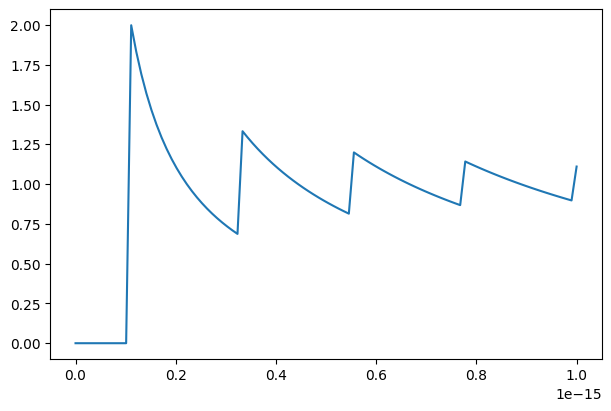

In [117]:
from matplotlib.pyplot import subplots

fig, ax = subplots(figsize=(6,4),constrained_layout=True)
x = np.linspace(1e-15,1e-20,num=100)
f = ((1+x)-1)/x
ax.plot(x,f);

### O épsilon de máquina

A unidade de arredondamedssdnto, $\epsilon_M$, comumente chamada de "épsilon de máquina", é definida como o menor número do sistema computacional tal que

$$1.0 + \epsilon_M > 1.0.$$

Esta inequação também pode ser lida da seguinte forma: $\epsilon_M$ é a diferença entre a unidade e o próximo número mais próximo dela representável pela máquina.

Para entender isto, vamos usar um sistema hipotético de 8 bits, no qual cada número é representado por uma sequencia de até 8 dígitos binários. Em um sistema de 8 bits, uma "palavra" (termo da Arquitetura Computacional) armazena um número real da seguinte forma: 

- o primeiro bit é reservado para o sinal do número
- os próximos 3 bits são reservados para o expoente (com _bias_)
- os últimos 4 bits são reservados para a mantissa. 

Neste sistema, a unidade $(1)_{10}$ é representada em forma binária por: $00110000$. 

O próximo número de máquina neste sistema seria $00110001$, que equivale a $(1.0625)_{10}$.

Portanto, para este sistema $\epsilon_M = (1.0625)_{10} - (1)_{10} = 0.0625$.

Explicando um pouco mais...

Para 8 bits, o _bias_ é o quociente inteiro resultante da divisão de $(2^3 - 1)/2 = 3$. Então, usando a expressão de ponto flutuante

$$x = (-1)^s \, 2^{(c-bias)} \, (1 + f),$$ 

temos que

$c = 0 \times 2^2 + 1 \times 2^1 + 1 \times 2^0 = 3$ (esquerda para a direita, correspondendo às posições 2,3 e 4). Como o número é positivo, $s = 0$. A mantissa corresponde às 4 últimas caixas, que são zero, i.e. $f = 0$.

Por fim, $x = (-1)^0 \, 2^{(3-3)} \, (1+0) = 1$ e a representação de 8 bits de 1 é $00110000$.

Para $\epsilon_M$, note que o próximo número tem uma contribuição de $2^{-4} = 0.0625$. Ou seja, a mantissa decresce para a direita $2^{-1}, 2^{-2}, 2^{-3}, 2^{-4}$. O ponto "decimal" (radix) fica implícito e o expoente cresce para a esquerda, $2^0, 2^1$, e $2^2$.

Em seguida, o próximo número representável (depois de $1.0625$) teria uma contribuição de $2^{-4} + 2^{-3} = 0.1875$, sendo, pois, $1.1875$. Evidentemente, $1.1875 - 1.0625 = 0.125$, mas $\epsilon_M < 0.125$. Isto mostra que a unidade de arredondamento não equivale a uma "distância" no sentido dos números reais como se vê na representação de reta perfurada. 

## Exemplos

### Sistema de 16 bits

- Comporta faixa de binários de $0000000000000000$ a $1111111111111111$
- Limite superior: $(1 \times 2^{14}) + (1 \times 2^{13}) + \ldots + (1 \times 2^1) + (1 \times 2^0) = 32767$
- Uma vez que $+0 = 0000000000000000$, $-0 = 1000000000000000$ é um negativo a mais
- Intervalo de inteiros representáveis: $[-32768,32767]$


### Limites de _underflow_ e _overflow_

Para o sistema $\mathbb{F}(10,3,-5,5)$, vejamos os seguintes casos: 

#### Caso I: número representável x número não representável

- $x = 235.89 = 0.23589 \times 10^3$ (5 dígitos na mantissa)
- $0.235 \times 10^3$ e $0.236 \times 10^3$ são representáveis
- $0.23589 \times 10^3$ não é representável (perda de dígitos significativos)

#### Caso II: número não representável por causa de _underflow_

- $x = 0.654 \times 10^{-7}$ (expoente rompeu o limite $L=-5$)

#### Caso III: número não representável por causa de _overflow_

- $x = 0.923 \times 10^{12}$ (expoente rompeu o limite $U=5$)

Considere $\mathbb{F}(2,3,-1,2)$. Represente os seguintes números, dados na base $10$, neste sistema de ponto flutuante normalizado.

a) $x = 0.25$

b) $x = 3.5$

c) $x = 0.125$

d) $x = 4$

e) $x = 0.3$

#### Solução 

Devemos ter $x = \pm 0.d_1d_2d_3 \times 2^e$, com $d_1 =1$, $d_2 \in \left\{0, 1\right\}$, $d_3 \in \left\{0, 1\right\}$
e $e \in \left\{-1, 0, 1, 2 \right\}$.

a) $x = 0.25$

Note que, $(0.25)_{10} = (0.01)_2 = 0.1 \times 2^{-1}$, i.e. $d_1 = 1$ e $ e  = -1$. Logo, a representação de $x$ neste sistema de ponto flutuante é: $x = + \,0.100 \times 2^{-1}$.

b) $ x = 3.5$ 

Aqui: $(3.5)_{10} = (11.1)_2 = 0.111 \times 2^{2}$, i.e. $d_1 = 1$ e $e = 2$. Como $2_{10} = (10)_2$, a representação de $x$ neste sistema de ponto flutuante é: $x = + \, 0.111 \times 2^{10}$.

c) $x = 0.125$

Aqui: $(0.125)_{10} = (0.001)_2 = 0.1 \times 2^{-2}$ , i.e, $d_1 = 1$ e $e = -2$. Como $e < L = -1$, 
temos _underflow_ (não representável).

d) $x = 4$

Note que, $(4)_{10} = (100)_2 = 0.1\times 2^{3}$, i.e $d_1 = 1$ e $e = 3$. Como $e > U = 2$, temos
_overflow_ (não representável).

e) $x = 0.3$

Note que, $(0.3)_{10} = (0.0\,1001\,1001\dots)_2 =(0.1001\,1001\dots)\times 2^{-1}$, i.e. $d_1 = 1$ e $e = {-1}$. Como devemos ter apenas 3 dígitos, este número **não é representável** neste sistema de ponto flutuante.

Se truncarmos em 3 dígitos, então temos uma aproximação para $x$ dada por 
$$0.100 \times 2^{-1} =(0.0100)_2 = \\
0\times \frac{1}{2} + 1\times \frac{1}{4} + 0 \times \frac{1}{8}+ 0 \times \frac{1}{16} + 0 \times \frac{1}{32} = \\ (0.25)_{10} \ne (0.3)_{10}.$$

### Maior e menor número representável

Considerando o mesmo sistema de ponto flutuante do exemplo anterior, determinar:

a) O menor número real positivo representável neste sistema

b) O maior número real positivo representável neste sistema

#### Solução

O menor número real positivo representável neste sistema é 

$$x_{min} = 0.100\times 2^{-1} = (0.010)_{2} = 0\times \frac{1}{2} + 1 \times \frac{1}{4} = (0.25)_{10}.$$

O maior número real positivo representável neste sistema é
$$x_{max} = 0.111\times 2^2 = (11.1)_{2} = 1\times 2^1 + 1 \times 2^0 + 1\times \frac{1}{2} =(3.5)_{10}.$$

Lembre que no Exemplo 1.4, c), com $x = (0.125)_{10}$, e no Exemplo 1.4 d), com $ x = 4_{10}$, tivemos
situações de _underflow_ e _overflow_, respectivamente.

Já no Exemplo anterior, e), com $x = (0.3)_{10}$, tivemos  truncamento/aproximação.

### Números representáveis

Determinar todos os números reais que são *representáveis exatamente* no sistema $\mathbb{F}(2,3,-1,2)$.

#### Solução

Como $ t = 3 $, as possíveis mantissas não nulas são: $ (0.100)_2, (0.101)_2, (0.110)_2 $ e $(0.111)_2 $.
Como $L=−1$ e $U=2$, os possíveis expoentes são: $−1 0,1$ e $2$. Assim, os números positivos 
com representação exata são:

$$
(0.100)_2 \times 2^{-1} = \frac{1}{2} \times 2^{-1} = (0.25)_{10} = x_{min} \\
(0.100)_2 \times 2^{-1} = \frac{1}{2} \times 2^{-1} = (0.5)_{10} \\
(0.100)_2 \times 2^1    = \frac{1}{2} \times 2^1    = (1.0)_{10} \\
(0.100)_2 \times 2^2    = \frac{1}{2} \times 2^2    = (2.0)_{10} \\
\phantom{2} \\
(0.101)_2 \times 2^{-1} = \left( \frac{1}{2} + \frac{1}{8} \right) \times 2^{-1} = (0.3125)_{10} \\
(0.101)_2 \times 2^{-1} = \left( \frac{1}{2} + \frac{1}{8} \right) \times 2^{-1} = (0.625)_{10} \\
(0.101)_2 \times 2^1    = \left( \frac{1}{2} + \frac{1}{8} \right) \times 2^1    = (1.25)_{10} \\
(0.101)_2 \times 2^2    = \left( \frac{1}{2} + \frac{1}{8} \right) \times 2^2    = (2.5)_{10} \\
\phantom{2} \\
(0.110)_2 \times 2^{-1} = \left( \frac{1}{2} + \frac{1}{4} \right) \times 2^{-1} = (0.375)_{10} \\
(0.110)_2 \times 2^{-1} = \left( \frac{1}{2} + \frac{1}{4} \right) \times 2^{-1} = (0.75)_{10} \\
(0.110)_2 \times 2^1    = \left( \frac{1}{2} + \frac{1}{4} \right) \times 2^1    = (1.5)_{10} \\
(0.110)_2 \times 2^2    = \left( \frac{1}{2} + \frac{1}{4} \right) \times 2^2    = (3.0)_{10} \\
\phantom{2} \\
(0.111)_2 \times 2^{-1} = \left( \frac{1}{2} + \frac{1}{4} + \frac{1}{8} \right) \times 2^{-1} = (0.4375)_{10} \\
(0.111)_2 \times 2^{-1} = \left( \frac{1}{2} + \frac{1}{4} + \frac{1}{8} \right) \times 2^{-1} = (0.875)_{10} \\
(0.111)_2 \times 2^1    = \left( \frac{1}{2} + \frac{1}{4} + \frac{1}{8} \right) \times 2^1    = (1.75)_{10} \\
(0.111)_2 \times 2^2    = \left( \frac{1}{2} + \frac{1}{4} + \frac{1}{8} \right) \times 2^2    = (3.5)_{10} = x_{max} \\
$$
Portanto, temos apenas **33** números reais _representáveis exatamente_ neste sistema. 
Todos os acima e os negativos, i.e.:

$$0.0, \pm 0.25, \pm 0.3125, \dots, \pm 3.5$$